## Assignment 9 ST1/ST1G Capstone Project

### 1. Reading the Dataset

In [23]:
import pandas as pd
import numpy as np

# Read train and test datasets
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

print('Shape of training dataset before deleting duplicate values:', train_data.shape)

# Removing duplicate rows if any
train_data=train_data.drop_duplicates()
print('Shape of training dataset after deleting duplicate values:', train_data.shape)

# Printing sample data
train_data.head(10)

Shape of training dataset before deleting duplicate values: (2452, 8)
Shape of training dataset after deleting duplicate values: (2452, 8)


,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0
5,P-5597,B-1487,home decor festive needs,table decor handicrafts,showpieces,5.0,9/4/2020,746.0
6,P-8398,B-3078,footwear,women s footwear,casual shoes,4.1,4/12/2017,1798.0
7,P-10744,B-2830,kitchen dining,cookware,pots pans,3.1,1/12/2013,955.0
8,P-4042,B-1045,home decor festive needs,wall decor clocks,paintings,2.4,18/3/2019,21770.0
9,P-360,B-88,automotive,accessories spare parts,car interior exterior,2.3,10/5/2018,199.0


From the data we can observe the following:
- The training dataset contains 2452 product entries.
- It has 8 attributes: Product, Product_Brand, Item_Category, Subcategory_1, Subcategory_2, Item_Rating, Date, Selling_Price.
- 0 duplicates found in the training dataset.

### 2. Problem Statement Definition

To create a prediction model that could predict the selling price of an item at e-commerce website using various features available for the product.

### 3. Target Variable Identification

Target variable for this dataset is Selling_Price.

### 4. Visualizing the Distribution of Target Variable

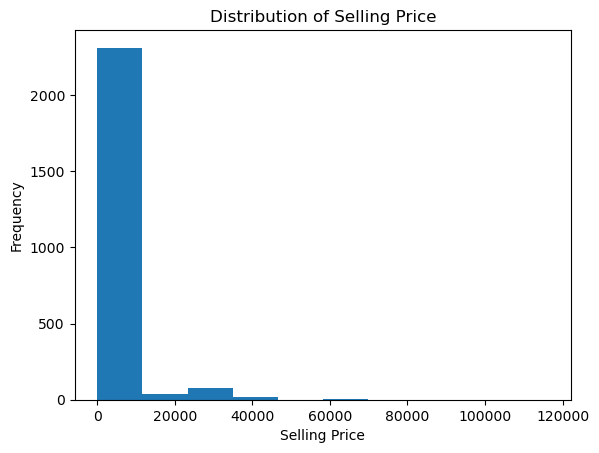

In [24]:
import matplotlib.pyplot as plt

# Visualize Selling_Price distribution
plt.hist(train_data['Selling_Price'], bins=10)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Price')
plt.show()

From the histogram we can see that it is skewed to the right, with majority of selling price under $20000. A skewed data is not a good indication of a model that could give an effective model. We can also try checking with the logarithmic value of the variable.

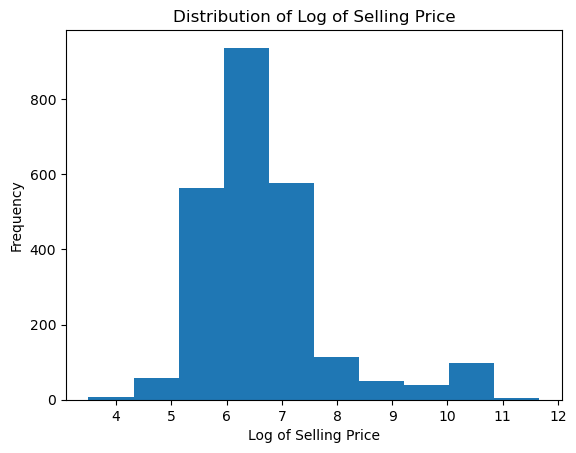

In [25]:
# Calculate the log of Selling_Price
log_selling_price = np.log(train_data['Selling_Price'])

# Visualize log of Selling_Price distribution
plt.hist(log_selling_price, bins=10)
plt.xlabel('Log of Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Log of Selling Price')
plt.show()

Log of Selling price distribution gives a much better graph, showing normality in the data.

### 5. Data Exploration

In [26]:
train_data.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2452 non-null   object 
 1   Product_Brand  2452 non-null   object 
 2   Item_Category  2452 non-null   object 
 3   Subcategory_1  2452 non-null   object 
 4   Subcategory_2  2452 non-null   object 
 5   Item_Rating    2452 non-null   float64
 6   Date           2452 non-null   object 
 7   Selling_Price  2452 non-null   float64
dtypes: float64(2), object(6)
memory usage: 153.4+ KB


In [28]:
train_data.describe()

,Item_Rating,Selling_Price
count,2452.000000,2452.000000
mean,3.078467,2494.375612
std,1.187137,7115.256516
min,1.000000,33.000000
25%,2.000000,371.000000
50%,3.100000,596.000000
75%,4.100000,1195.250000
max,5.000000,116289.000000


In [29]:
train_data.nunique()

Product          2452
Product_Brand    1010
Item_Category      75
Subcategory_1     130
Subcategory_2     336
Item_Rating        41
Date              483
Selling_Price    1095
dtype: int64

##### Observations
From the above information we can see that
1. There are no null values in the dataset. Hence, no need to remove null values.
2. Item_Rating and Selling_Price are the only attributes that are float data type.
3. Majority(75%) of the selling price fall under $2000.

### 6. Identifying and Rejecting Unwanted Columns

From the data exploration we can see that 'Product', 'Product_Brand' and 'Date' are not that significant to the analysis and moreover the unique values in these columns are very high which would make the dataset really big when we do encoding for the categorical variables. Hence, these 3 columns can be rejected.

In [30]:
# Remove 'Product', 'Product_Brand' and 'Date' columns
train_data.drop(['Product', 'Product_Brand', 'Date'], axis=1, inplace=True)
test_data.drop(['Product', 'Product_Brand', 'Date'], axis=1, inplace=True)

### 7. Visual Exploratory Data Analysis

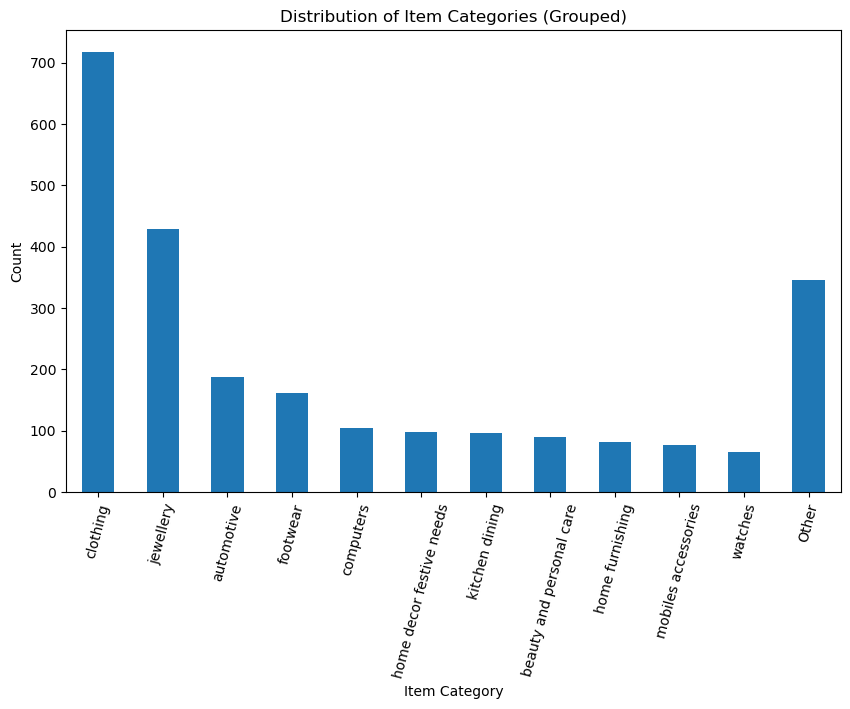

In [31]:
# Group infrequent categories into 'Other' category
threshold = 50  # Categories with less than 50 occurrences are grouped
category_counts = train_data['Item_Category'].value_counts()
filtered_categories = category_counts[category_counts > threshold]
filtered_categories['Other'] = category_counts[category_counts <= threshold].sum()

plt.figure(figsize=(10, 6))
filtered_categories.plot(kind='bar')
plt.xlabel('Item Category')
plt.ylabel('Count')
plt.title('Distribution of Item Categories (Grouped)')
plt.xticks(rotation=75)
plt.show()

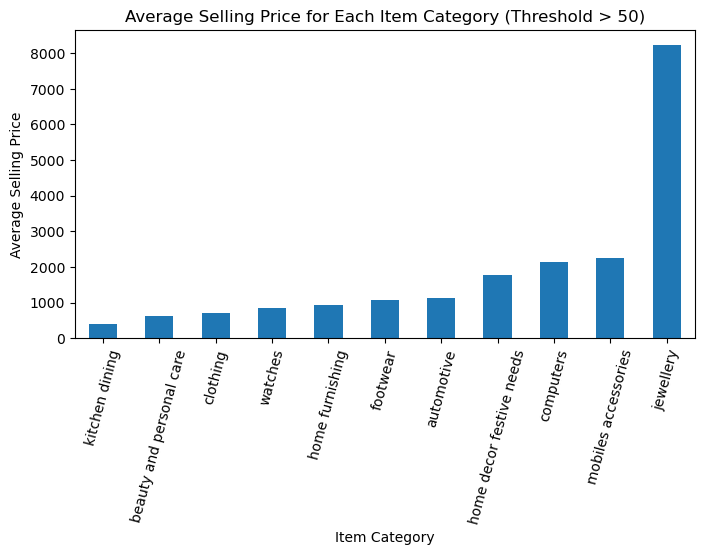

In [32]:
# Calculate average price for each item category
average_price_by_category = train_data.groupby('Item_Category')['Selling_Price'].mean().sort_values()

# Filter categories based on a threshold
threshold = 50  # Categories with less than 50 occurrences are excluded
filtered_categories = average_price_by_category[average_price_by_category.index.isin(category_counts[category_counts > threshold].index)]

# Plotting the bar chart
plt.figure(figsize=(8, 4))
filtered_categories.plot(kind='bar')
plt.xlabel('Item Category')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price for Each Item Category (Threshold > 50)')
plt.xticks(rotation=75)
plt.show()

##### Observations:
- Distribution of Item Category bar chart shows count of each item category in the dataset. 
- We can see that clothing is the item category with the highest count, followed by jewellery.
- Those with less than 50 occurences have been grouped together as 'Other'.
- In the Item cateogry vs Selling Price we can see the average selling price of each item category.
- Those with less than 50 occurences have been excluded.

### 8. Data Conversion to numeric values for machine learning/predictive analysis
Here we convert the categorical variables to numerical variables using Label Encoder.

In [33]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
label_encoder = LabelEncoder()

# Apply Label Encoding to 'Item_Category' column
train_data['Item_Category_Encoded'] = label_encoder.fit_transform(train_data['Item_Category'])
test_data['Item_Category_Encoded'] = label_encoder.fit_transform(test_data['Item_Category'])

# Apply Label Encoding to 'Subcategory_1' column
train_data['Subcategory_1_Encoded'] = label_encoder.fit_transform(train_data['Subcategory_1'])
test_data['Subcategory_1_Encoded'] = label_encoder.fit_transform(test_data['Subcategory_1'])

# Apply Label Encoding to 'Subcategory_2' column
train_data['Subcategory_2_Encoded'] = label_encoder.fit_transform(train_data['Subcategory_2'])
test_data['Subcategory_2_Encoded'] = label_encoder.fit_transform(test_data['Subcategory_2'])

# Save the label encoder object to a file
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [34]:
train_data.head()

,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,Item_Category_Encoded,Subcategory_1_Encoded,Subcategory_2_Encoded
0,bags wallets belts,bags,hand bags,4.3,291.0,7,10,137
1,clothing,women s clothing,western wear,3.1,897.0,10,127,329
2,home decor festive needs,showpieces,ethnic,3.5,792.0,29,112,101
3,beauty and personal care,eye care,h2o plus eye care,4.0,837.0,8,37,134
4,clothing,men s clothing,t shirts,4.3,470.0,10,80,296


### 9. Feature Selection based on Data Distribution
After encoding, we can see that the categorical variables have all been converted to numerical. Now we need to remove the categorical variables from the dataset.

In [35]:
# Remove the original categorical columns
train_data.drop(['Item_Category', 'Subcategory_1', 'Subcategory_2'], axis=1, inplace=True)
test_data.drop(['Item_Category', 'Subcategory_1', 'Subcategory_2'], axis=1, inplace=True)
train_data.head()

,Item_Rating,Selling_Price,Item_Category_Encoded,Subcategory_1_Encoded,Subcategory_2_Encoded
0,4.3,291.0,7,10,137
1,3.1,897.0,10,127,329
2,3.5,792.0,29,112,101
3,4.0,837.0,8,37,134
4,4.3,470.0,10,80,296


### 10. Removal of Outliers and Null values
- Outlier is an observation that differs significantly from the other observations in the dataset.
- In our dataset we can see from the histogram that there could be outliers in the 'Selling_Price' as we can observe a tail towards the right.
- Outliers need to be handled before building the models as the model can be biased and skew the results, reducing the accuracy of our prediction.
- Therefore, we will be removing the outliers from our dataset.
- Earlier, we had found that the dataset doesn't contain any null values. Therefore, we don't need to check and remove again.

In [36]:
# Calculate the interquartile range (IQR) for Selling_Price
Q1 = train_data['Selling_Price'].quantile(0.25)
Q3 = train_data['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on the lower and upper bounds
train_data = train_data[(train_data['Selling_Price'] >= lower_bound) & (train_data['Selling_Price'] <= upper_bound)]

### 10. Visual and Statistic Correlation analysis
Now we can see the correlation between variables using correlation matrix and heatmap.

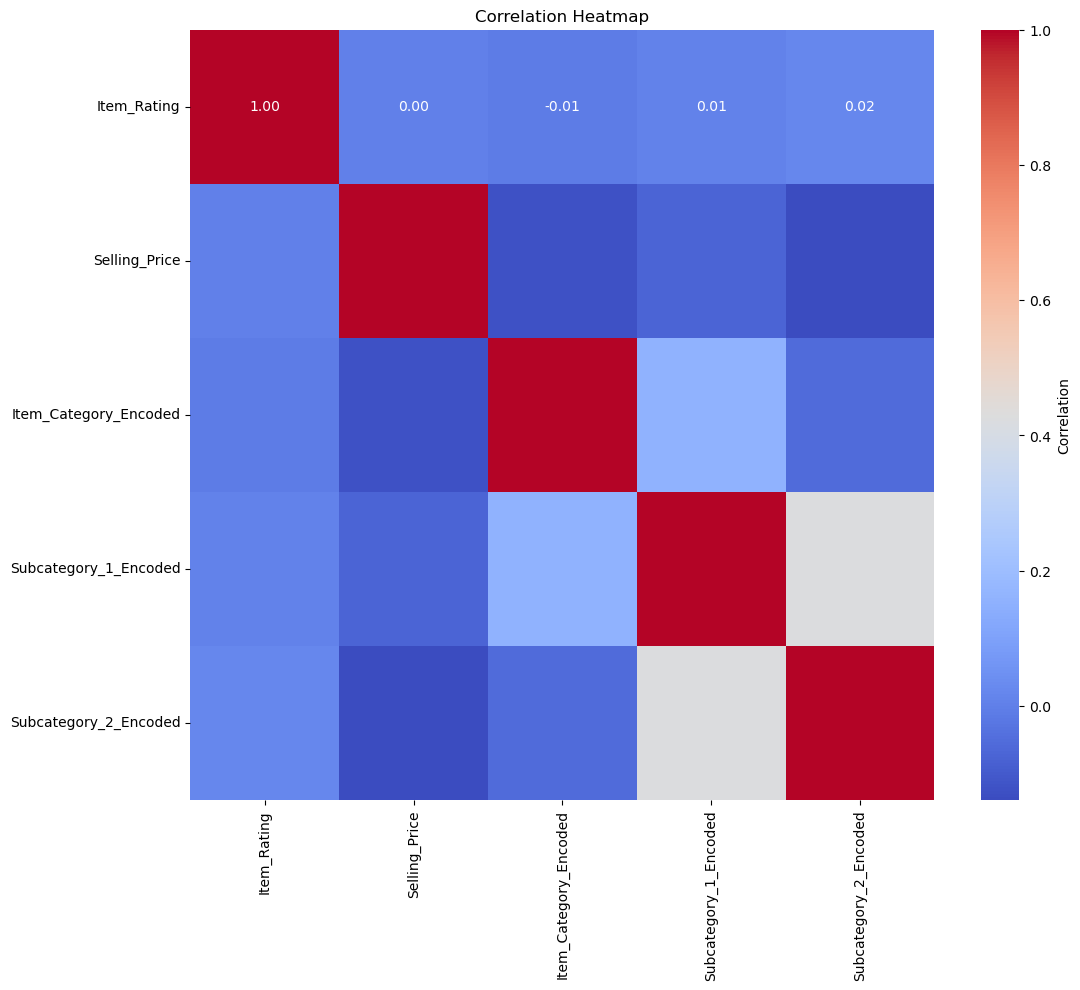

In [37]:
import seaborn as sns

# Correlation heatmap
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')
plt.show()

### 12. Training/Testing Sampling
- After all the pre-processing, we can now perform model training.
- Before that we need to split our training dataset into X and y.

In [38]:
from sklearn.model_selection import train_test_split

# Splitting the data into features and target variable
X_train = train_data.drop('Selling_Price', axis=1)
y_train = train_data['Selling_Price']

# splitting the data into train and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
print(X_train.shape)
#print(X_test.shape)

(2192, 4)


### 13. Investigating Multiple Regression Models using K-Fold Cross Validation
- We will be using 3 different regression algorithms
  1. Linear Regression Model
  2. Random Forest Regression Model
  3. Gradient Boosting Regression Model
- For each model we will be doing K-Fold cross validation.
- Each dataset is divided into K equal subsets, taking 1 subset for validation and remaining for training.
- RMSE(Root Mean Square Error) is calculated for each model
- Lower the RMSE, better the model.
- The model with least RMSE is selected as the best model
- For our project we will be taking K = 5.

In [40]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize empty dictionaries to store RMSE scores and best model
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

best_model = None
best_rmse = float('inf')  # Initialize with a high value

# Perform K-fold cross-validation for each model
for model_name, model in models.items():
    rmse_scores_sum = 0.0
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


        # Fit the model
        model.fit(X_train_fold, y_train_fold)

        # Make predictions on the validation set
        y_val_pred = model.predict(X_val_fold)

        # Calculate RMSE for this fold and store in list
        rmse = mean_squared_error(y_val_fold, y_val_pred, squared=False)
        rmse_scores_sum += rmse

    # Calculate average RMSE for the model
    avg_rmse = rmse_scores_sum / num_folds
    print(f'Average RMSE for {model_name} = {avg_rmse}')
    # Update best model if current model has lower RMSE
    if avg_rmse < best_rmse:
        best_model = model_name
        best_rmse = avg_rmse


Average RMSE for Linear Regression = 476.69327910666425
Average RMSE for Random Forest Regression = 445.60852170336614
Average RMSE for Gradient Boosting Regression = 408.48630632099014


### 14. Selection of the best model
- From among the models trained above we will select the best model. The best model is the one with the least RMSE
- After identifying the best model we will train the model on the entire training set, which then can be used to make predictions on the test set.

In [41]:
# Print the best model and its RMSE
print(f'Best Model: {best_model}')
print(f'Average RMSE for {best_model} (K-fold cross-validation): {best_rmse}')

Best Model: Gradient Boosting Regression
Average RMSE for Gradient Boosting Regression (K-fold cross-validation): 408.48630632099014


### 15. Saving the best Model
The best model can be now saved for future use.

In [19]:
# Define the best model based on the results of K-fold cross-validation
best_model = GradientBoostingRegressor()

# Train the best model on the entire training dataset
best_model.fit(X_train, y_train)

# Save the trained model to a file
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
    
# Make predictions on the test dataset
#y_pred = best_model.predict(X_test)


### 16. GUI Deployment using Tkinter
- Atlast we can use Tkinter to create Graphic User Interface.
- We can load the prediction model that was saved earlier to predict the item prices.
- User will be asked to enter inputs and on clicking 'Predict' button the predicted price will be displayed in a message box.

In [57]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
#from sklearn.ensemble import GradientBoostingRegressor


# Load the label encoder object from file
with open('label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

# Load the trained model from file
with open('trained_model.pkl', 'rb') as file:
    best_model = pickle.load(file)


# Function to predict the price
def predict_price():
    try:
        product = product_entry.get()
        brand = brand_entry.get()
        item_category = category_entry.get()
        subcategory_1 = subcategory_1_entry.get()
        subcategory_2 = subcategory_2_entry.get()
        rating = float(rating_entry.get())

        # Prepare input data for prediction as a DataFrame
        input_data = pd.DataFrame({
            #'Product': [product],
            #'Product_Brand': [product_brand],
            'Item_Rating': [rating],
            'Item_Category_Encoded': item_category,
            'Subcategory_1_Encoded': subcategory_1,
            'Subcategory_2_Encoded': subcategory_2
            
        })
        
        # Make prediction using the best model
        predicted_price = best_model.predict(input_data)
        
        # Display the predicted price in a message box
        messagebox.showinfo('Price Prediction', f'Predicted Price of the Item: ${predicted_price[0]:.2f}')
    except Exception as e:
        messagebox.showerror('Error', f'An error occurred: {str(e)}')

# Create the main window
window = tk.Tk()
window.title('E-Commerce Price Prediction')

# Create labels and input fields
product_label = ttk.Label(window, text='Product:')
product_label.grid(row=0, column=0, padx=5, pady=5)
product_entry = ttk.Entry(window)
product_entry.grid(row=0, column=1, padx=5, pady=5)

brand_label = ttk.Label(window, text='Brand:')
brand_label.grid(row=1, column=0, padx=5, pady=5)
brand_entry = ttk.Entry(window)
brand_entry.grid(row=1, column=1, padx=5, pady=5)

category_label = ttk.Label(window, text='Category:')
category_label.grid(row=2, column=0, padx=5, pady=5)
category_entry = ttk.Entry(window)
category_entry.grid(row=2, column=1, padx=5, pady=5)

subcategory_1_label = ttk.Label(window, text='Subcategory 1:')
subcategory_1_label.grid(row=3, column=0, padx=5, pady=5)
subcategory_1_entry = ttk.Entry(window)
subcategory_1_entry.grid(row=3, column=1, padx=5, pady=5)

subcategory_2_label = ttk.Label(window, text='Subcategory 2:')
subcategory_2_label.grid(row=4, column=0, padx=5, pady=5)
subcategory_2_entry = ttk.Entry(window)
subcategory_2_entry.grid(row=4, column=1, padx=5, pady=5)

rating_label = ttk.Label(window, text='Rating:')
rating_label.grid(row=5, column=0, padx=5, pady=5)
rating_entry = ttk.Entry(window)
rating_entry.grid(row=5, column=1, padx=5, pady=5)

predict_button = ttk.Button(window, text='Predict', command=predict_price)
predict_button.grid(row=6, column=0, columnspan=2, padx=5, pady=10)

result_label = ttk.Label(window, text='')
result_label.grid(row=7, column=0, columnspan=2, padx=5, pady=5)

# Start the GUI event loop
window.mainloop()